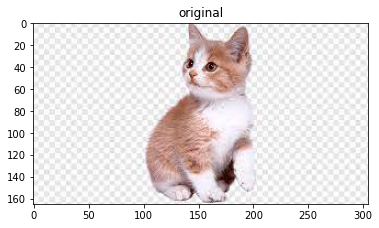

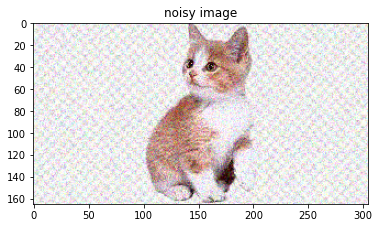

In [5]:
#adding noise
import matplotlib.pyplot as plt
from skimage.util import random_noise
butterfly = plt.imread("cat1.jpg")
noisy_image = random_noise(butterfly)
# plot_comparison(butterfly,noisy_image,'Noisy image' )
plt.title("original")
plt.imshow(butterfly)
plt.show()
plt.title("noisy image")
plt.imshow(noisy_image)
plt.show()

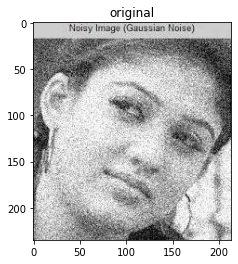

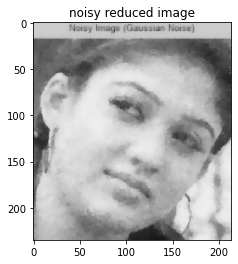

In [6]:
#reducing noisy
from skimage.restoration import denoise_tv_chambolle
noisy_image = plt.imread("reduce.jpg")
denoised_image = denoise_tv_chambolle(noisy_image, multichannel = True)
plt.title("original")
plt.imshow(noisy_image)
plt.show()
plt.title("noisy reduced image")
plt.imshow(denoised_image)
plt.show()

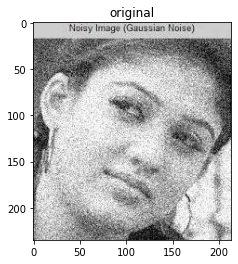

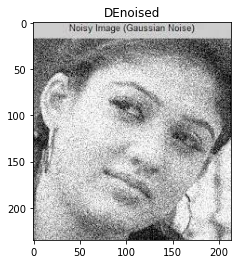

In [7]:
#Reducing Noise while preserving edges
from skimage.restoration import denoise_bilateral
landscape_img = plt.imread("reduce.jpg")
denoised_img = denoise_bilateral(landscape_img, multichannel = True)
plt.title("original")
plt.imshow(landscape_img)
plt.show()
plt.title("DEnoised")
plt.imshow(denoised_img)
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_8972/3799986895.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments = 400)
C:\Users\User\AppData\Local\Temp/ipykernel_8972/3799986895.py:5: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image, kind = 'avg')


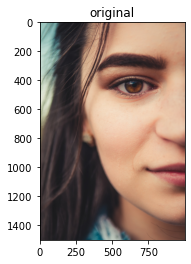

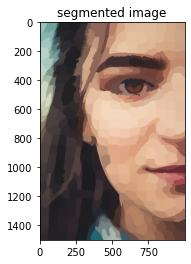

In [32]:
from skimage.segmentation import slic
from skimage.color import label2rgb
face_image = plt.imread("face.jpg")
segments = slic(face_image, n_segments = 400)
segmented_image = label2rgb(segments, face_image, kind = 'avg')
plt.title("original")
plt.imshow(face_image.astype('uint8'))
plt.show()
plt.title("segmented image")
plt.imshow(segmented_image.astype('uint8'))
plt.show()

In [29]:
#Contouring shapes
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1], contour[:, 0], linewidth= 3)
    plt.imshow(image, interpolation = 'nearest', cmap= 'gray_r')
    plt.title("contours")
    plt.axis("off")

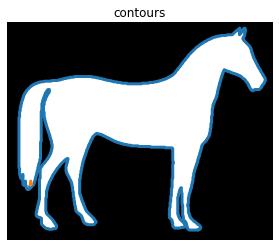

In [30]:
from skimage import measure, data
horse_image = data.horse()
contours = measure.find_contours(horse_image, level = 0.8)
show_image_contour(horse_image, contours)

C:\Users\User\AppData\Local\Temp/ipykernel_8972/2030391906.py:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_dices = color.rgb2gray(image_dices)


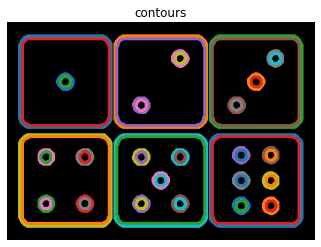

In [56]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1], contour[:, 0], linewidth= 3)
    plt.imshow(image, interpolation = 'nearest', cmap= 'gray_r')
    plt.title("contours")
    plt.axis("off")
    
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage import color

image_dices = imread("dice.png")

image_dices = color.rgb2gray(image_dices)

thresh = threshold_otsu(image_dices)

binary = image_dices > thresh

contours = measure.find_contours(binary, level = 0.8)

show_image_contour(image_dices, contours)


dice dots number:22.


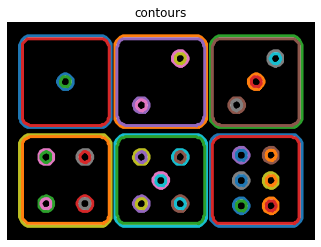

In [57]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1], contour[:, 0], linewidth= 3)
    plt.imshow(image, interpolation = 'nearest', cmap= 'gray_r')
    plt.title("contours")
    plt.axis("off")
import numpy as np
shape_contours  = [cnt.shape[0] for cnt in contours]
max_dots_shape = 50
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0]<max_dots_shape]
show_image_contour(binary, contours)
print("dice dots number:{}.".format(len(dots_contours)))